# 10.4 F1 Scorce

## 10.4.1 兼顾精准率和召回率的评价指标
   - 兼顾精准率和召回率
   - F1 Score是precision和recall的调和平均值
    
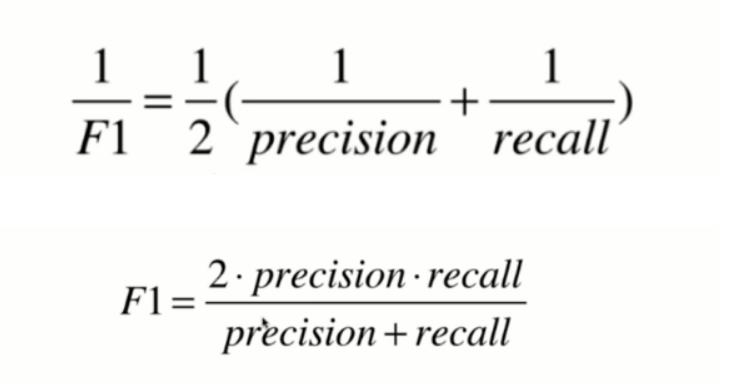

## 10.4.2 实现F1 Score

In [1]:
import numpy as np

In [2]:
def f1_score(precision, recall):
    try:
        return 2*precision*recall / (precision+recall)
    except:
        return 0.0

In [3]:
precision = 0.5
recall = 0.5
f1_score(precision, recall)

0.5

In [4]:
precision = 0.1
recall = 0.9
f1_score(precision, recall)

0.18000000000000002

In [5]:
precision = 0.0
recall = 1.0
f1_score(precision, recall)

0.0

## 10.4.3 Scikit-learn 中的F1 Score

In [6]:
from sklearn import datasets

digits = datasets.load_digits()
X = digits.data
y = digits.target.copy()

# 将十分类问题转化为二分类问题
y[digits.target==9] = 1
y[digits.target!=9] = 0

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [8]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg.score(X_test, y_test)

D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9755555555555555

In [9]:
y_log_predict = log_reg.predict(X_test)

In [10]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_log_predict)

array([[403,   2],
       [  9,  36]], dtype=int64)

In [11]:
from sklearn.metrics import precision_score

precision_score(y_test, y_log_predict)

0.9473684210526315

In [12]:
from sklearn.metrics import recall_score

recall_score(y_test, y_log_predict)

0.8

In [13]:
# 精准率和召回率比accuracy_score都低
# 而且经过调和平均后，f1_score更能评价模型
from sklearn.metrics import f1_score

f1_score(y_test, y_log_predict)

0.8674698795180723